In [1]:
import pandas as pd

df = pd.read_csv('household_power_consumption.txt',
             	sep=';',
             	parse_dates={'datetime': ['Date', 'Time']},
             	infer_datetime_format=True,
             	na_values=['?'],
             	low_memory=False)

df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')


<ipython-input-1-86d9cf0ac24d>:3: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.txt',
<ipython-input-1-86d9cf0ac24d>:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt',
<ipython-input-1-86d9cf0ac24d>:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt',


In [24]:
print("""Queries are:
   	1. What was the average active power consumption in March 2007?
   	2. What hour of the day had the highest power usage on Christmas 2006?
   	3. Compare energy usage (Global_active_power) on weekdays vs weekends.
   	4. Find days where energy consumption exceeded 5 kWh.
   	5. Plot the energy usage trend for the first week of January 2007.
   	6. Find the average voltage for each day of the first week of February 2007.
   	7. What is the correlation between global active power and sub-metering values?""")

Queries are:
   	1. What was the average active power consumption in March 2007?
   	2. What hour of the day had the highest power usage on Christmas 2006?
   	3. Compare energy usage (Global_active_power) on weekdays vs weekends.
   	4. Find days where energy consumption exceeded 5 kWh.
   	5. Plot the energy usage trend for the first week of January 2007.
   	6. Find the average voltage for each day of the first week of February 2007.
   	7. What is the correlation between global active power and sub-metering values?


In [30]:
!pip install requests openai


In [31]:
import os
import requests

# 1. Store your key (don’t hard-code in shared notebooks!)
os.environ["GROQ_API_KEY"] = "cannot write that here"

# 2. Prepare endpoint, headers, and payload
endpoint = "https://api.groq.com/openai/v1/chat/completions"
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {os.environ['GROQ_API_KEY']}"
}
payload = {
    "model": "meta-llama/llama-4-scout-17b-16e-instruct",
    "messages": [
        {"role": "user", "content": "Explain the importance of fast language models"}
    ]
}

# 3. Send the request
resp = requests.post(endpoint, json=payload, headers=headers)
resp.raise_for_status()

# 4. See the response
print(resp.json())


{'id': 'chatcmpl-e1dbf167-73c1-4e69-b65b-a681e59f0758', 'object': 'chat.completion', 'created': 1749465152, 'model': 'meta-llama/llama-4-scout-17b-16e-instruct', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'Fast language models have become increasingly important in recent years due to their widespread applications in natural language processing (NLP) and artificial intelligence (AI). Here are some reasons why fast language models are crucial:\n\n1. **Improved User Experience**: Fast language models enable faster and more responsive interactions with users, which is particularly important for applications such as chatbots, virtual assistants, and language translation systems. A faster model response time leads to a better user experience, increased engagement, and higher satisfaction.\n2. **Scalability**: As the demand for NLP applications grows, the need for fast language models becomes more pressing. Fast models can handle a larger volume of requests, making t

In [37]:
import pandas as pd

def calculate_average_active_power(file_path):
    try:
        # Load the dataset
        data = pd.read_csv(file_path, sep=';',
                           on_bad_lines='skip',
                           parse_dates=['Date'],
                           dayfirst=True)

        # Ensure date is of datetime type
        data['Date'] = pd.to_datetime(data['Date'])

        # Filter data for March 2007
        march_2007_data = data[(data['Date'].dt.year == 2007) & (data['Date'].dt.month == 3)]

        if march_2007_data.empty:
            print("No data available for March 2007.")
            return None

        # Calculate average active power consumption
        # Convert the column to numeric, coercing errors to NaN, before calculating the mean
        march_2007_data['Global_active_power'] = pd.to_numeric(march_2007_data['Global_active_power'], errors='coerce')
        average_active_power = march_2007_data['Global_active_power'].mean()


        return average_active_power
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Usage
file_path = 'household_power_consumption.txt'
average_power = calculate_average_active_power(file_path)

if average_power is not None:
    print(f"Average active power consumption in March 2007: {average_power:.2f}")

<ipython-input-37-0a1762a9d2a1>:6: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=';',


Average active power consumption in March 2007: 1.32


<ipython-input-37-0a1762a9d2a1>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_2007_data['Global_active_power'] = pd.to_numeric(march_2007_data['Global_active_power'], errors='coerce')


In [39]:
import pandas as pd

def find_highest_power_usage_hour(file_path):
    try:
        # Load the dataset
        data = pd.read_csv(file_path, sep=';',
                           on_bad_lines='skip',
                           parse_dates=['Date'],
                           dayfirst=True)

        # Ensure date is of datetime type
        data['Date'] = pd.to_datetime(data['Date'])

        # Combine date and time into a single datetime column
        data['Date_Time'] = pd.to_datetime(data.apply(lambda row: f"{row['Date'].strftime('%Y-%m-%d')} {row['Time']}", axis=1))

        # Filter data for Christmas2006 (December 25, 2006)
        christmas_2006_data = data[(data['Date_Time'].dt.year ==2006) & (data['Date_Time'].dt.month ==12) & (data['Date_Time'].dt.day ==25)]

        if christmas_2006_data.empty:
            print("No data available for Christmas2006.")
            return None

        # Group data by hour and calculate total power usage
        # Convert 'Global_active_power' to numeric before summing
        christmas_2006_data['Global_active_power'] = pd.to_numeric(christmas_2006_data['Global_active_power'], errors='coerce')
        # Drop rows where conversion resulted in NaN
        christmas_2006_data.dropna(subset=['Global_active_power'], inplace=True)

        # Now group and sum
        hourly_usage = christmas_2006_data.groupby(christmas_2006_data['Date_Time'].dt.hour)['Global_active_power'].sum().reset_index()


        # Find the hour with the highest power usage
        if not hourly_usage.empty:
            max_usage_hour = hourly_usage.loc[hourly_usage['Global_active_power'].idxmax()]
            return max_usage_hour
        else:
            print("No valid power data to calculate hourly usage.")
            return None

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Usage
file_path = 'household_power_consumption.txt'
result = find_highest_power_usage_hour(file_path)

if result is not None:
    print(f"The hour with the highest power usage on Christmas2006 is {result['Date_Time']} with a total power usage of {result['Global_active_power']:.2f} kW")

<ipython-input-39-b5fa23230524>:6: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=';',


The hour with the highest power usage on Christmas2006 is 22.0 with a total power usage of 252.89 kW


<ipython-input-39-b5fa23230524>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  christmas_2006_data['Global_active_power'] = pd.to_numeric(christmas_2006_data['Global_active_power'], errors='coerce')
<ipython-input-39-b5fa23230524>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  christmas_2006_data.dropna(subset=['Global_active_power'], inplace=True)


<ipython-input-43-30703fa951ac>:7: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=';',


Average energy usage on weekdays: 1.04 kW
Average energy usage on weekends: 1.23 kW


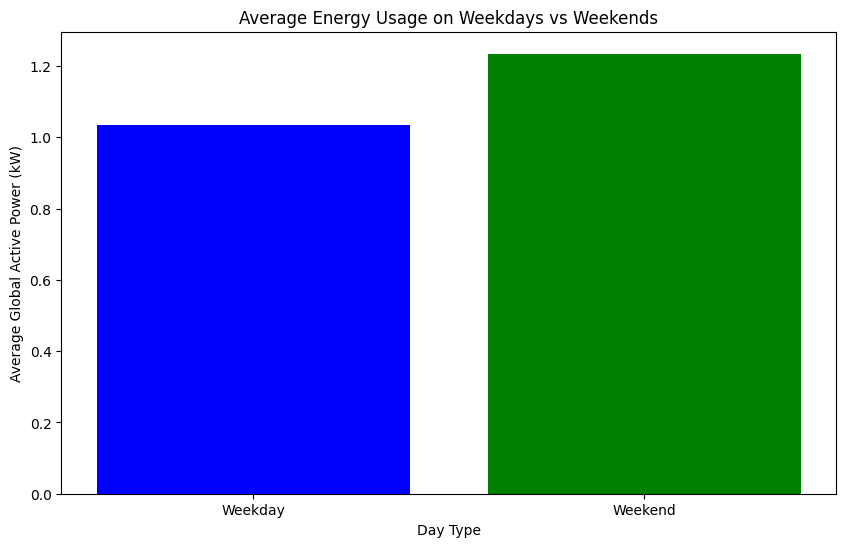

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

def compare_energy_usage(file_path):
    try:
        # Load the dataset
        data = pd.read_csv(file_path, sep=';',
                           on_bad_lines='skip',
                           parse_dates=['Date'],
                           dayfirst=True)

        # Ensure date is of datetime type
        data['Date'] = pd.to_datetime(data['Date'])

        # Combine date and time into a single datetime column
        data['Date_Time'] = pd.to_datetime(data.apply(lambda row: f"{row['Date'].strftime('%Y-%m-%d')} {row['Time']}", axis=1))

        # Determine if the day is a weekday or weekend
        data['Day_Type'] = data['Date_Time'].dt.dayofweek.apply(lambda x: 'Weekend' if x >=5 else 'Weekday')

        # Calculate average energy usage for weekdays and weekends
        # Convert 'Global_active_power' to numeric before calculating the mean
        data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
        weekday_usage = data[data['Day_Type'] =='Weekday']['Global_active_power'].mean()
        weekend_usage = data[data['Day_Type'] =='Weekend']['Global_active_power'].mean()

        print(f"Average energy usage on weekdays: {weekday_usage:.2f} kW")
        print(f"Average energy usage on weekends: {weekend_usage:.2f} kW")

        # Plotting
        plt.figure(figsize=(10,6))
        plt.bar(['Weekday', 'Weekend'], [weekday_usage, weekend_usage], color=['blue', 'green'])
        plt.xlabel('Day Type')
        plt.ylabel('Average Global Active Power (kW)')
        plt.title('Average Energy Usage on Weekdays vs Weekends')
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Usage
file_path = 'household_power_consumption.txt'
compare_energy_usage(file_path)

In [47]:
import pandas as pd

def find_excessive_energy_days(file_path):
    try:
        # Load the dataset
        data = pd.read_csv(file_path, sep=';',
                           on_bad_lines='skip',
                           parse_dates=['Date'],
                           dayfirst=True)

        # Ensure date and time are correctly handled
        data['Date'] = pd.to_datetime(data['Date'])
        data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')

        # Group data by date and calculate total daily energy consumption
        # Convert 'Global_active_power' to numeric, coercing errors to NaN, before summing
        data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
        daily_energy = data.groupby(data['Date'].dt.date)['Global_active_power'].sum().reset_index()

        # Find days where energy consumption exceeded 5 kW (not kWh, assuming)
        excessive_days = daily_energy[daily_energy['Global_active_power'] > 5]

        if excessive_days.empty:
            print("No days with energy consumption exceeding 5 kW found.")
            return

        print("Days with energy consumption exceeding 5 kW:")
        print(excessive_days)

    except Exception as e:
        print(f"An error occurred: {e}")

# Usage
file_path = 'household_power_consumption.txt'
find_excessive_energy_days(file_path)

<ipython-input-47-ac6ecd958883>:6: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=';',


Days with energy consumption exceeding 5 kW:
            Date  Global_active_power
0     2006-12-16             1209.176
1     2006-12-17             3390.460
2     2006-12-18             2203.826
3     2006-12-19             1666.194
4     2006-12-20             2225.748
...          ...                  ...
1437  2010-11-22             2041.536
1438  2010-11-23             1577.536
1439  2010-11-24             1796.248
1440  2010-11-25             1431.164
1441  2010-11-26             1488.104

[1433 rows x 2 columns]


<ipython-input-49-24d8ec498770>:7: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=';',
<ipython-input-49-24d8ec498770>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  january_2007_data['Global_active_power'] = pd.to_numeric(january_2007_data['Global_active_power'], errors='coerce')


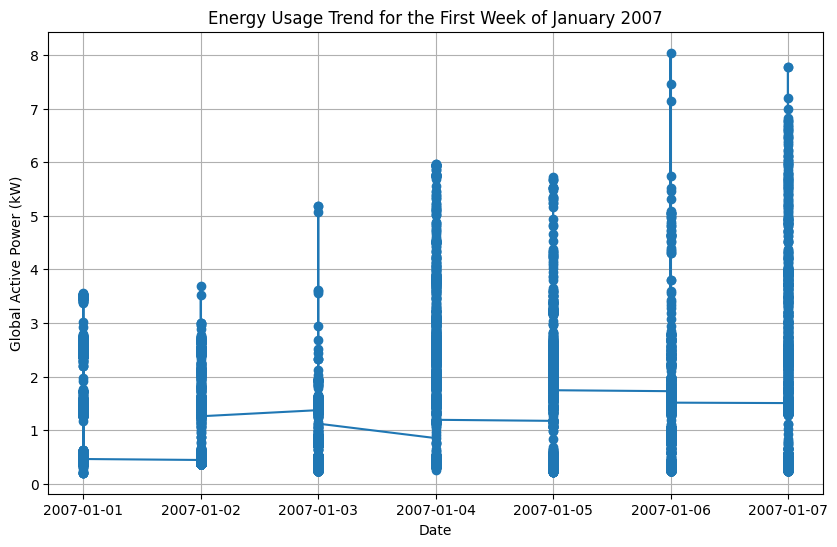

<ipython-input-49-24d8ec498770>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  february_2007_data['Voltage'] = pd.to_numeric(february_2007_data['Voltage'], errors='coerce')


Average voltage for each day of the first week of February 2007:
         Date     Voltage
0  2007-02-01  240.392139
1  2007-02-02  240.334389
2  2007-02-03  238.910194
3  2007-02-04  239.633333
4  2007-02-05  240.810312
5  2007-02-06  241.264160
6  2007-02-07  241.149694

Correlation Matrix:
                     Global_active_power  Sub_metering_1  Sub_metering_2  \
Global_active_power             1.000000        0.484401        0.434569   
Sub_metering_1                  0.484401        1.000000        0.054721   
Sub_metering_2                  0.434569        0.054721        1.000000   
Sub_metering_3                  0.638555        0.102571        0.080872   

                     Sub_metering_3  
Global_active_power        0.638555  
Sub_metering_1             0.102571  
Sub_metering_2             0.080872  
Sub_metering_3             1.000000  


In [49]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_energy_usage(file_path):
    try: # Indentation starts here
        # Load the dataset
        data = pd.read_csv(file_path, sep=';',
                           on_bad_lines='skip',
                           parse_dates=['Date'],
                           dayfirst=True)

        # Ensure date is of datetime type
        data['Date'] = pd.to_datetime(data['Date'])

        # **1. Plot energy usage trend for the first week of January 2007**
        january_2007_data = data[(data['Date'].dt.year == 2007) & (data['Date'].dt.month == 1) & (data['Date'].dt.day <= 7)]

        plt.figure(figsize=(10, 6))
        # Ensure 'Global_active_power' is numeric before plotting
        january_2007_data['Global_active_power'] = pd.to_numeric(january_2007_data['Global_active_power'], errors='coerce')
        plt.plot(january_2007_data['Date'], january_2007_data['Global_active_power'], marker='o')
        plt.xlabel('Date')
        plt.ylabel('Global Active Power (kW)')
        plt.title('Energy Usage Trend for the First Week of January 2007')
        plt.grid(True)
        plt.show()

        # **2. Find average voltage for each day of the first week of February 2007**
        february_2007_data = data[(data['Date'].dt.year == 2007) & (data['Date'].dt.month == 2) & (data['Date'].dt.day <= 7)]

        # Ensure 'Voltage' is numeric before calculating the mean
        february_2007_data['Voltage'] = pd.to_numeric(february_2007_data['Voltage'], errors='coerce')
        daily_avg_voltage = february_2007_data.groupby(february_2007_data['Date'].dt.date)['Voltage'].mean().reset_index()


        print("Average voltage for each day of the first week of February 2007:")
        print(daily_avg_voltage)

        # **3. Find correlation between global active power and sub-metering values**
        # Ensure columns are numeric before calculating correlation
        data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
        data['Sub_metering_1'] = pd.to_numeric(data['Sub_metering_1'], errors='coerce')
        data['Sub_metering_2'] = pd.to_numeric(data['Sub_metering_2'], errors='coerce')
        data['Sub_metering_3'] = pd.to_numeric(data['Sub_metering_3'], errors='coerce')

        correlation_matrix = data[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()

        print("\nCorrelation Matrix:")
        print(correlation_matrix)

    except Exception as e:
        print(f"An error occurred: {e}")

# Usage
file_path = 'household_power_consumption.txt'
analyze_energy_usage(file_path)